In [1]:
# Imports
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
# Dataset for Classification
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

print("Samples: ", len(x))

Samples:  569


In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
print(x_train.shape, x_test.shape)

# Params für KNN: n_neighbors (4), weights (2), p (2)
# 4x2x2 = 16
parameters = {"n_neighbors": [1, 3, 5, 7], "weights": ["uniform", "distance"], "p": [1, 2]}
neigh = KNeighborsClassifier()

# GridSearchCV 
# 16x3 = 48
clf = GridSearchCV(neigh, parameters, cv=3)
clf.fit(x_train, y_train)

(398, 30) (171, 30)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
for key in clf.cv_results_.keys():
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
param_p
param_weights
params
split0_test_score
split1_test_score
split2_test_score
mean_test_score
std_test_score
rank_test_score


In [8]:
clf.cv_results_["params"]

[{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}]

In [9]:
print("Best params set found: ")
print(clf.best_params_, "\n")

means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.3f) for %r" % (mean, std*2, params))

Best params set found: 
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} 

0.920 (+/-0.015) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.920 (+/-0.015) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.910 (+/-0.013) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.910 (+/-0.013) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.917 (+/-0.043) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.915 (+/-0.036) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.915 (+/-0.026) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.917 (+/-0.033) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.930 (+/-0.014) for {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.927 (+/-0.019) for {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.922 (+/-0.014) for {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.917 (+/-0.037) for {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.915 (+/-0.026) for {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.915 (+/

In [11]:
neigh = KNeighborsClassifier(n_neighbors=5, p=1, weights="uniform")
neigh.fit(x_train, y_train)
score = neigh.score(x_test, y_test)

print("Score: ", score)

Score:  0.9590643274853801


[]

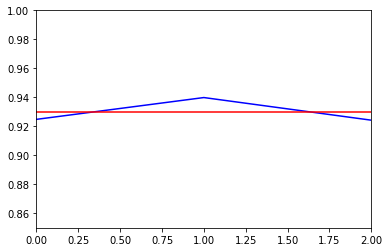

In [15]:
#split0_test_score
#split1_test_score
#split2_test_score

cv0 = clf.cv_results_["split0_test_score"][8]
cv1 = clf.cv_results_["split1_test_score"][8]
cv2 = clf.cv_results_["split2_test_score"][8]

plt.plot(range(3), [cv0, cv1, cv2], color="blue")
plt.xlim(0, 2)
plt.ylim(0.85, 1.0)
plt.axhline(np.mean([cv0, cv1, cv2]), color="red")
plt.plot()